In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# <div style="text-align: center; font-size: 24px; font-weight: bold; color: #800000;">Crush Data Report</div>


<img src="https://i.kinja-img.com/image/upload/c_fill,h_900,q_60,w_1600/479ff0950b32efe2417576d56243bf16.jpg" alt="Description of image" style="width: 100%; height: auto;">


In [109]:
url = "https://raw.githubusercontent.com/oribachar13579/oriandyuval/main/1.08_Crash_Data_Report_(detail).csv"
strike_df = pd.read_csv(url)
strike_df.head()

,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,...,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
0,-111.95221,33.42191,1,2598369,2012/01/01 07:25:00+00,2012,University Dr,Hardy Dr,0.000,Intersection Non Interchange,...,Driver,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.42191,-111.95221
1,-111.93769,33.42319,2,2593420,2012/01/01 11:45:00+00,2012,7th St,Myrtle Ave,139.920,Not Junction Related,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.42319,-111.93769
2,-111.89196,33.41842,3,2588493,2012/01/01 18:07:00+00,2012,Price Rd,Orange St,0.000,Intersection Interchange,...,Driver,31.0,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.41842,-111.89196
3,-111.94791,33.41779,4,2584449,2012/01/02 00:03:00+00,2012,11th St,Judd St,200.112,Not Junction Related,...,Driverless,NaN,NaN,East,Properly Parked,NaN,NaN,NaN,33.41779,-111.94791
4,-111.92847,33.34956,5,2592211,2012/01/02 00:12:00+00,2012,Rural Rd,Elliot Rd,135.168,Intersection Related Non Interchange,...,Driver,20.0,Female,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.34956,-111.92847


In [110]:
strike_df.shape

(51407, 35)

In [111]:
strike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51407 entries, 0 to 51406
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X                    51081 non-null  float64
 1   Y                    51081 non-null  float64
 2   OBJECTID             51407 non-null  int64  
 3   Incidentid           51407 non-null  int64  
 4   DateTime             51407 non-null  object 
 5   Year                 51407 non-null  int64  
 6   StreetName           51201 non-null  object 
 7   CrossStreet          50744 non-null  object 
 8   Distance             51406 non-null  float64
 9   JunctionRelation     51406 non-null  object 
 10  Totalinjuries        51406 non-null  float64
 11  Totalfatalities      51406 non-null  float64
 12  Injuryseverity       51406 non-null  object 
 13  Collisionmanner      51406 non-null  object 
 14  Lightcondition       51406 non-null  object 
 15  Weather              51406 non-null 

In [112]:
strike_df.columns

Index(['X', 'Y', 'OBJECTID', 'Incidentid', 'DateTime', 'Year', 'StreetName',
       'CrossStreet', 'Distance', 'JunctionRelation', 'Totalinjuries',
       'Totalfatalities', 'Injuryseverity', 'Collisionmanner',
       'Lightcondition', 'Weather', 'SurfaceCondition', 'Unittype_One',
       'Age_Drv1', 'Gender_Drv1', 'Traveldirection_One', 'Unitaction_One',
       'Violation1_Drv1', 'AlcoholUse_Drv1', 'DrugUse_Drv1', 'Unittype_Two',
       'Age_Drv2', 'Gender_Drv2', 'Traveldirection_Two', 'Unitaction_Two',
       'Violation1_Drv2', 'AlcoholUse_Drv2', 'DrugUse_Drv2', 'Latitude',
       'Longitude'],
      dtype='object')

In [113]:
#החלפנו את שם העמודה לשם יותר ברור להבנה-מתאר מספור מהתאונה הראשונה עד האחרונה בקובץ זה
strike_df.rename(columns={'OBJECTID': 'NumOfAccident'}, inplace=True)
#החלפנו את איקס לקאורדינטת איקס על מנת שמיקום במפה ייראה ברור יותר, כנל ל וואי 
strike_df.rename(columns={'X': 'Coordinate_X'}, inplace=True)
strike_df.rename(columns={'Y': 'Coordinate_Y'}, inplace=True)

In [114]:
len(strike_df)

51407

In [115]:
strike_df["Year"].unique()


array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024], dtype=int64)

In [116]:
strike_df.tail()

,Coordinate_X,Coordinate_Y,NumOfAccident,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,...,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
51402,-111.926385,33.435558,51403,4155884,2024/03/14 13:15:00+00,2024,SR-202 Exit 7 T-Ramp,NaN,0.0,Not Junction Related,...,Driver,22.0,Female,East,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.435558,-111.926385
51403,-111.926404,33.435576,51404,4155885,2024/03/14 13:20:00+00,2024,SR-202 Exit 7 T-Ramp,NaN,0.0,Entrance Exit Ramp 205,...,Driver,25.0,Female,West,Making Right Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.435576,-111.926404
51404,-111.909869,33.436621,51405,4155890,2024/03/15 07:11:00+00,2024,SR-202 Exit 8 J-Ramp,NaN,0.0,Entrance Exit Ramp 205,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.436621,-111.909869
51405,-111.939524,33.386046,51406,4155893,2024/03/09 07:44:00+00,2024,US-60 Exit 173 J-Ramp,NaN,0.0,Entrance Exit Ramp 205,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.386046,-111.939524
51406,-111.968688,33.405953,51407,4156010,2024/03/08 19:59:00+00,2024,I-10 Exit 153 C2-Ramp,NaN,0.0,Not Junction Related,...,Driver,58.0,Male,West,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.405953,-111.968688


**יצרנו טבלת קורלציה אשר תעזור לנו להבחין היכן יש קשרים חזקים\חלשים יותר בין העמודות שלנו. הסבר לערכים שליליים:עמודות עם ערכים שליליים בטבלת הקורלציה מציינות קורלציה שלילית בין המשתנים. זה אומר שככל שערך אחד עולה, הערך השני יורד, ולהפך**

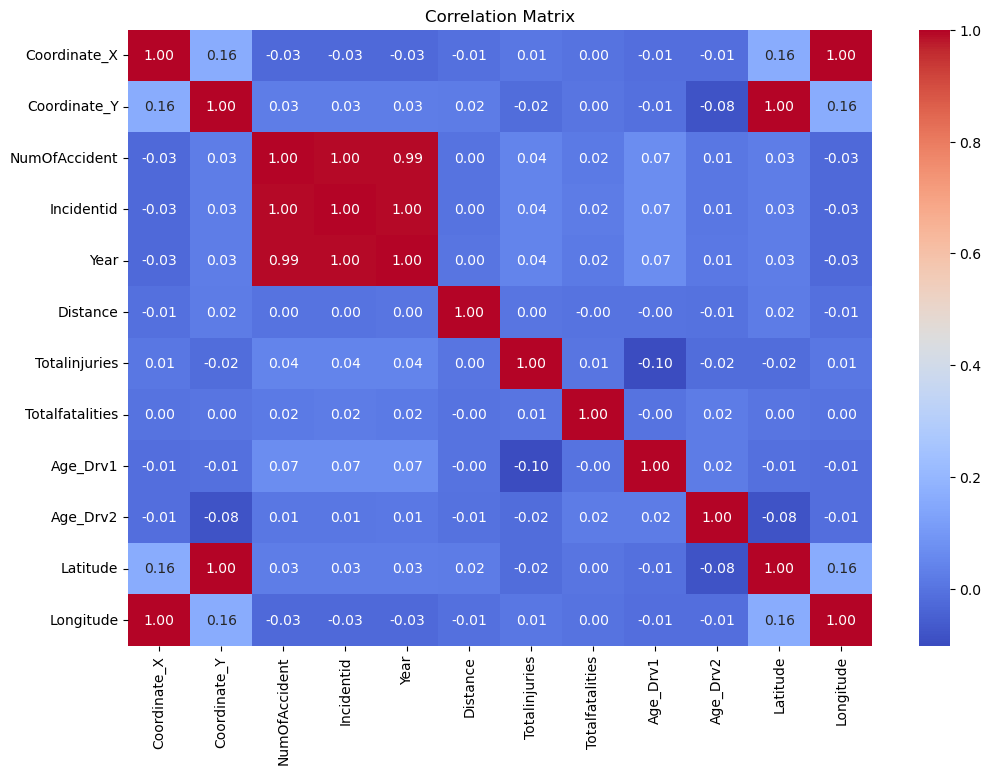

In [117]:
# בחירת העמודות המספריות בלבד
numeric_df = strike_df.select_dtypes(include=['float64', 'int64'])

# חישוב מטריצת הקורלציה
corr_matrix = numeric_df.corr()

# יצירת גרף חום של מטריצת הקורלציה
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## :נתון מעניין שקיבלנו

**ניתן לראות את כמות התאונות פר שנה שהתרחשו בעיר, הנחה שלנו הינה שבשנת 2020 החלה הקורונה ולכן המון אנשים הוכרחו להשאר בביתם ולכן לא יכלו לצאת עם רכבם לכבישים, מה שגרם לפחות תאונות**

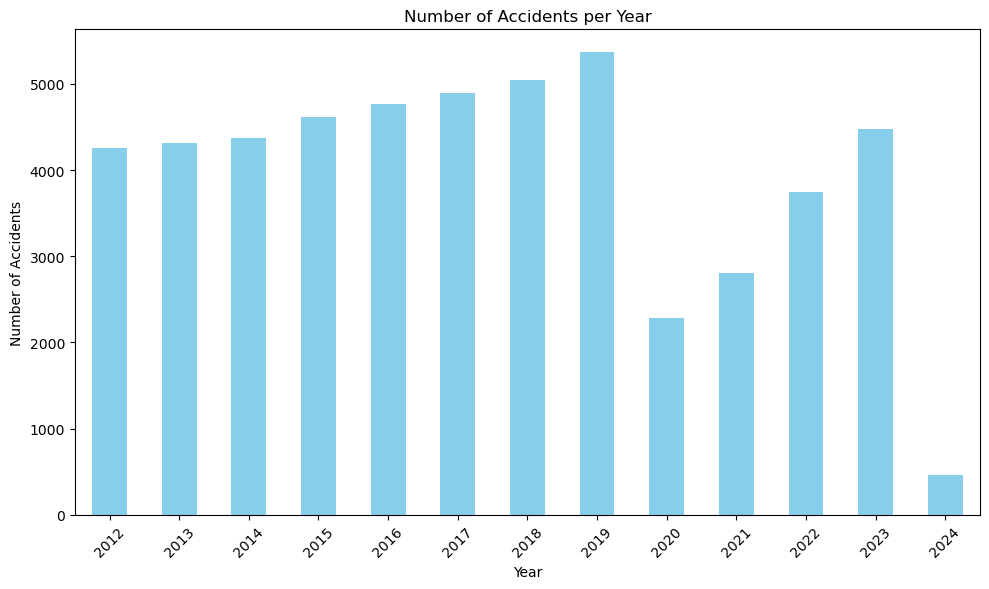

In [118]:
# Plot 1: Number of accidents per year
accidents_by_year = strike_df['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
accidents_by_year.plot(kind='bar', color='skyblue')
plt.title('Number of Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('accidents_per_year.png')


In [119]:
med_df= strike_df.groupby('Year')['NumOfAccident'].count()
med_df

Year
2012    4258
2013    4316
2014    4372
2015    4612
2016    4768
2017    4896
2018    5049
2019    5366
2020    2280
2021    2805
2022    3745
2023    4480
2024     460
Name: NumOfAccident, dtype: int64

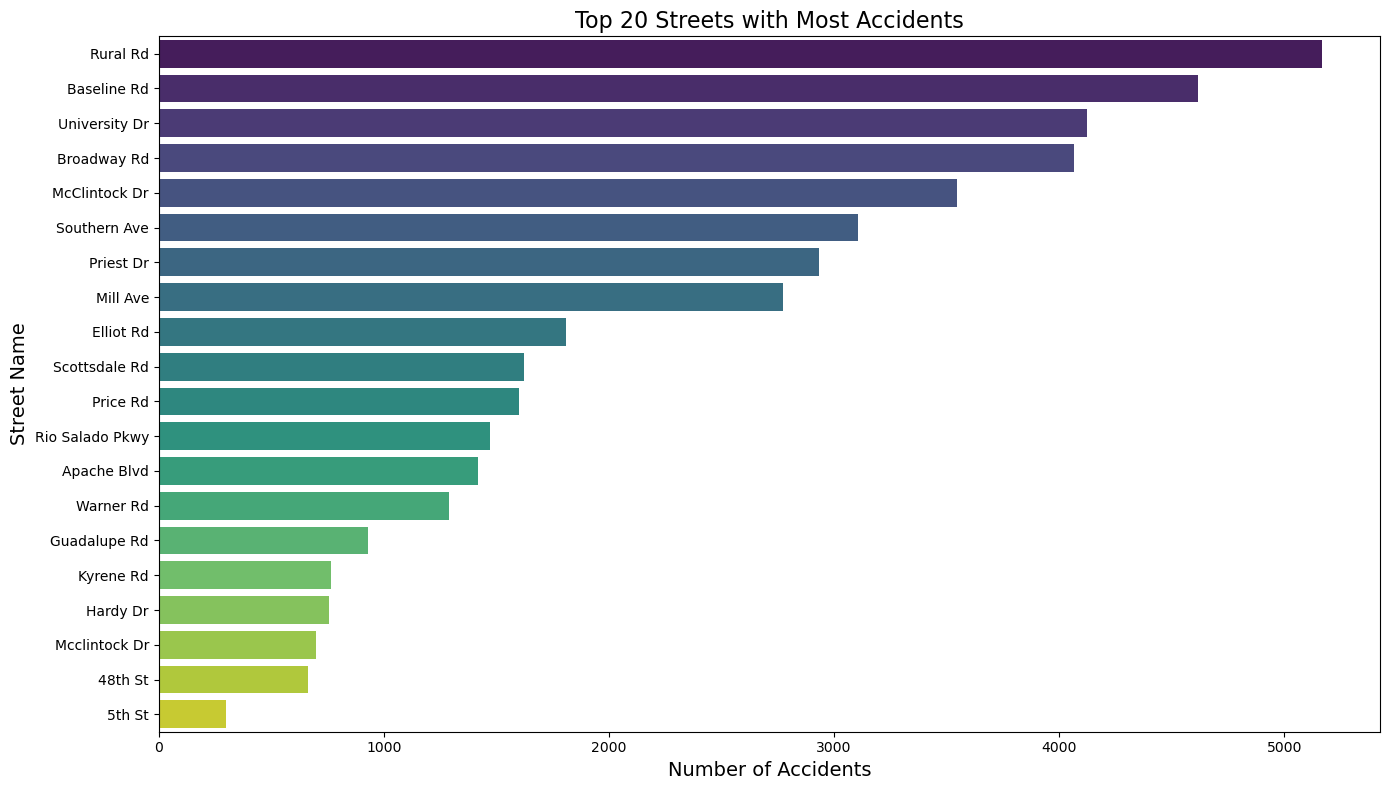

In [120]:
accidents_by_street = strike_df['StreetName'].value_counts().reset_index()
accidents_by_street.columns = ['StreetName', 'Number of Accidents']

# מציגים רק את 20 הרחובות עם מספר התאונות הגבוה ביותר
top_streets = accidents_by_street.head(20)

# יוצרים גרף עמודות שמראה את מספר התאונות ברחובות העליונים
plt.figure(figsize=(14, 8))
sns.barplot(data=top_streets, x='Number of Accidents', y='StreetName', palette='viridis')
plt.title('Top 20 Streets with Most Accidents', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=14)
plt.ylabel('Street Name', fontsize=14)
plt.tight_layout()
plt.savefig('top_streets_accidents.png')
plt.show()

In [121]:
#מתאר לנו כמה רחובות שונים יש בכל הקובץ
num_streets = len(accidents_by_street['StreetName'].unique())
print(num_streets)


522


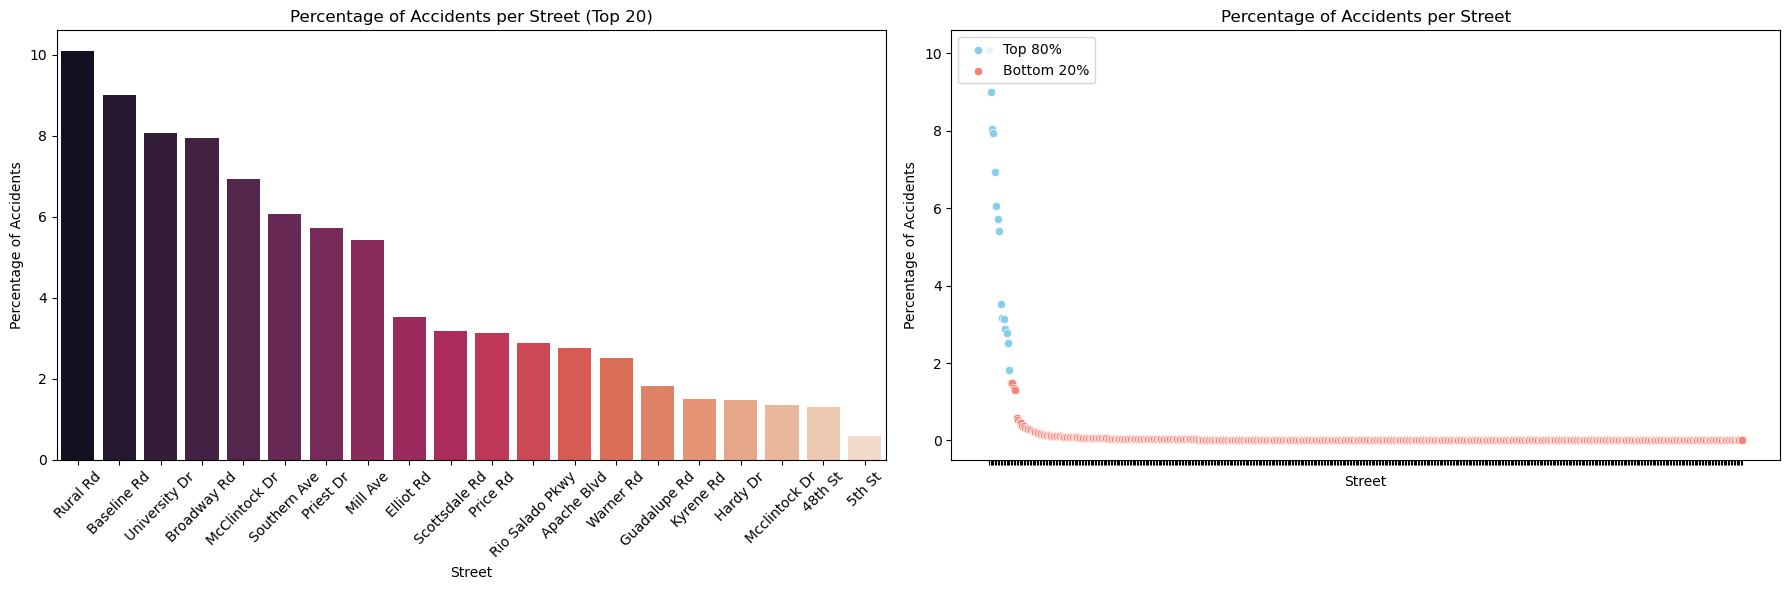

In [122]:
# חישוב סך כל התאונות
total_accidents = accidents_by_street['Number of Accidents'].sum()

# הוספת עמודה חדשה עם אחוזי התאונות לכל רחוב
accidents_by_street['Percentage of Accidents'] = (accidents_by_street['Number of Accidents'] / total_accidents) * 100

# ציור הגרף
plt.figure(figsize=(18, 6))

# גרף הברים
plt.subplot(1, 2, 1)
sns.barplot(x='StreetName', y='Percentage of Accidents', data=accidents_by_street.head(20), palette='rocket')
plt.title('Percentage of Accidents per Street (Top 20)')
plt.xlabel('Street')
plt.ylabel('Percentage of Accidents')
plt.xticks(rotation=45)

# גרף הscatterplot
plt.subplot(1, 2, 2)
sns.scatterplot(x=range(1, len(top_80_percent_streets) + 1), y='Percentage of Accidents', data=top_80_percent_streets, color='skyblue')
sns.scatterplot(x=range(len(top_80_percent_streets) + 1, len(top_80_percent_streets) + len(top_20_percent_streets) + 1), y='Percentage of Accidents', data=top_20_percent_streets, color='salmon')
plt.title('Percentage of Accidents per Street')
plt.xlabel('Street')
plt.ylabel('Percentage of Accidents')
plt.xticks(ticks=range(1, len(top_80_percent_streets) + len(top_20_percent_streets) + 1), labels=[''] * (len(top_80_percent_streets) + len(top_20_percent_streets)))
plt.legend(['Top 80%', 'Bottom 20%'], loc='upper left')

plt.tight_layout()
plt.show()


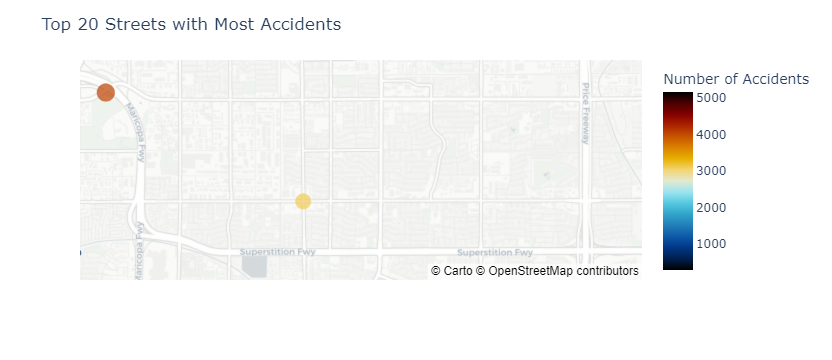

In [123]:

top_streets = accidents_by_street.head(20)

# מאחדים את הנתונים עם קואורדינטות X ו-Y
top_streets_coords = top_streets.merge(strike_df[['StreetName', 'Coordinate_X', 'Coordinate_Y']], on='StreetName', how='left').drop_duplicates(subset=['StreetName'])

# יוצרים מפה אינטראקטיבית
fig = px.scatter_mapbox(
    top_streets_coords,
    lat='Coordinate_Y',
    lon='Coordinate_X',
    hover_name='StreetName',
    hover_data={'Number of Accidents': True, 'Coordinate_X': False, 'Coordinate_Y': False},
    color='Number of Accidents',
    color_continuous_scale=px.colors.cyclical.IceFire,
    size='Number of Accidents',
    size_max=15,
    zoom=12,
    mapbox_style='carto-positron'
)

# מציגים את המפה
fig.update_layout(title='Top 20 Streets with Most Accidents')
fig.show()

<a id='section2'></a>
## 1. Insight number one:

**ניתן לראות על ידי גרף ה בארפלוט, סקאטרפלוט ועל ידי שימוש במפה, כי ישנם רחובות ראשיים ביותר בעיר אשר בהם מתרחשות מספר התאונות הגבוה ביותר, כפי שתואר קודם.בנוסף, ניתן לראות כי 20 הרחובות בהן קרו הכי הרבה תאונות מהוות בעצם כ80% מכל 522 הרחובות הקיימים ולכן ניתן להגיד כי ברחובות אילו נדרש לטפל יותר.
אנו משערים כי ניתן להתגבר על כך באמצעות אכיפה של כוחות הביטחון באזור כך שימנעו תאונות שם**

C:\Users\Yuval\AppData\Local\Temp\ipykernel_3952\9991592.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




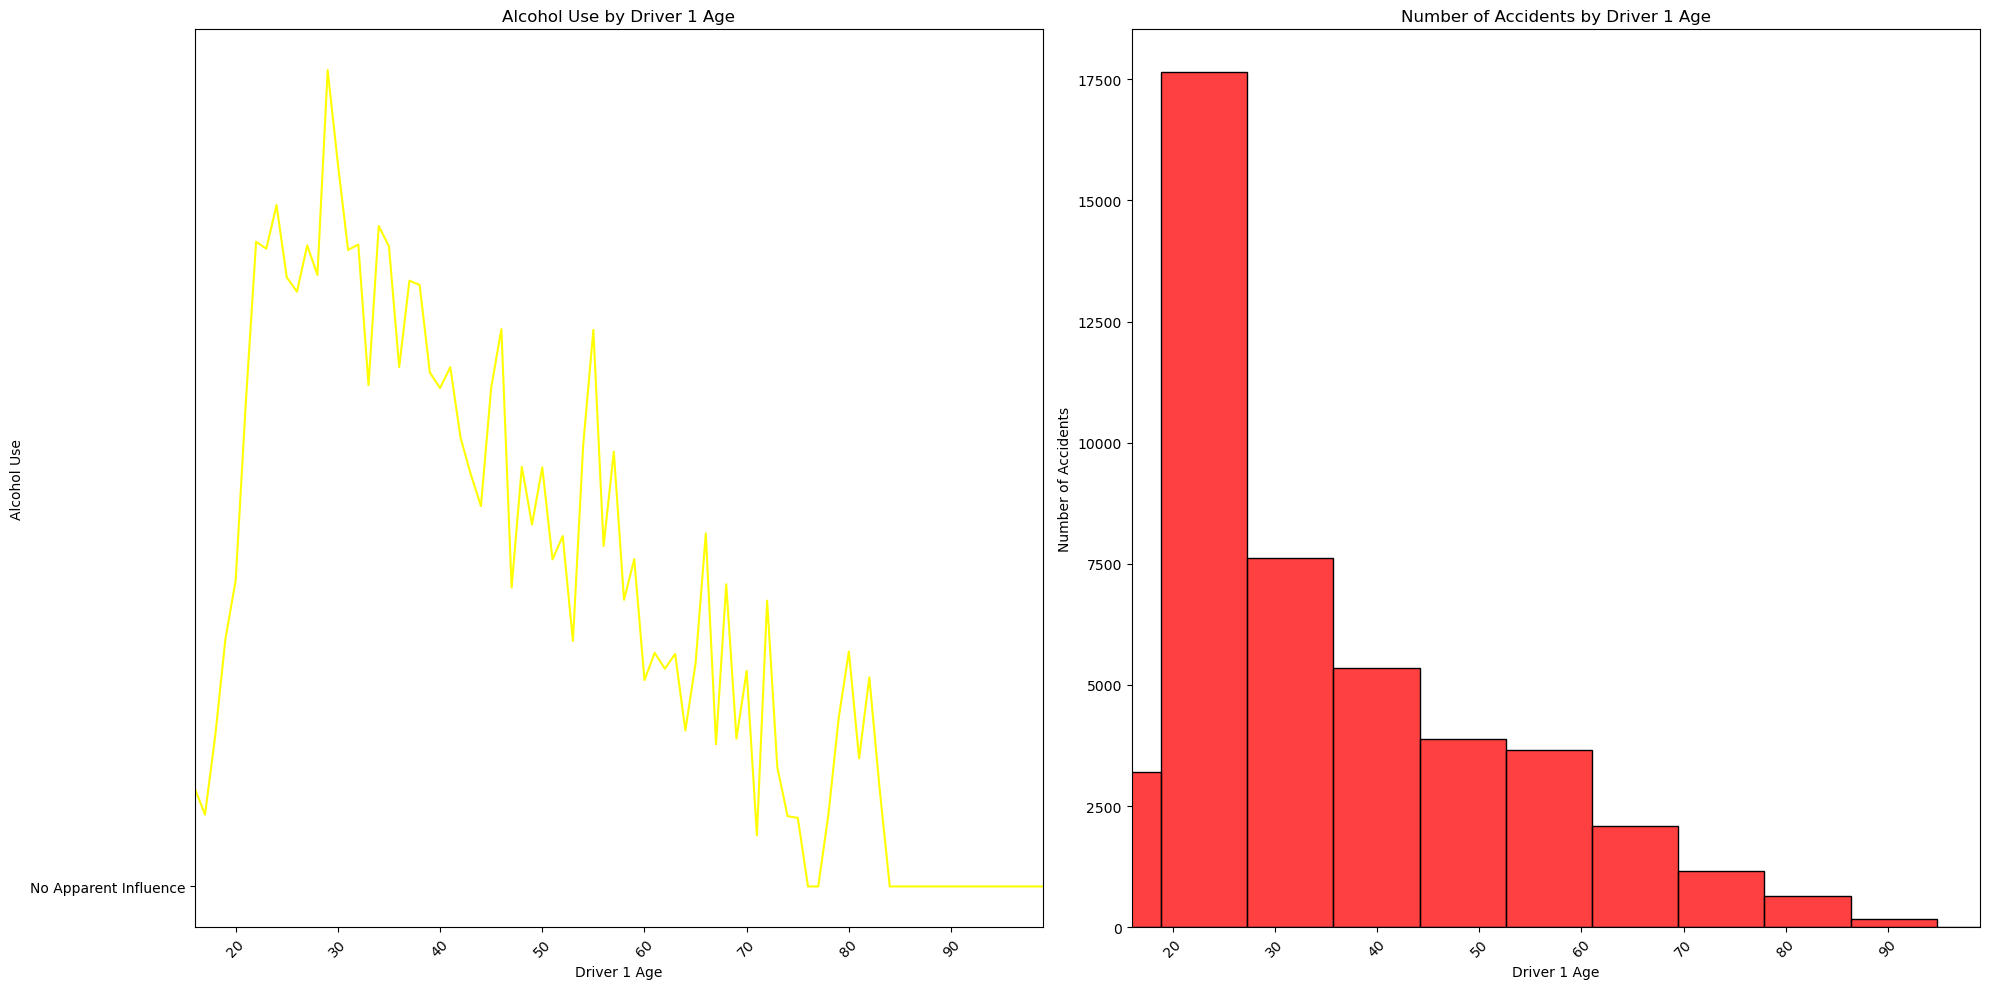

In [124]:
plt.figure(figsize=(20, 10))

# גרף השימוש באלכוהול לפי גיל הנהג
plt.subplot(1, 2, 1)
sns.lineplot(x='Age_Drv1', y='AlcoholUse_Drv1', data=strike_df, ci=None, color='yellow')
plt.xlabel('Driver 1 Age')
plt.ylabel('Alcohol Use')
plt.title('Alcohol Use by Driver 1 Age')
plt.xticks(rotation=45)
plt.xlim(16, 99)

# גרף מספר התאונות לפי גיל הנהג
plt.subplot(1, 2, 2)
sns.histplot(x='Age_Drv1', data=strike_df, bins=30, color='red')
plt.xlabel('Driver 1 Age')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Driver 1 Age')
plt.xticks(rotation=45)
plt.xlim(16, 99)

plt.tight_layout()
plt.show()


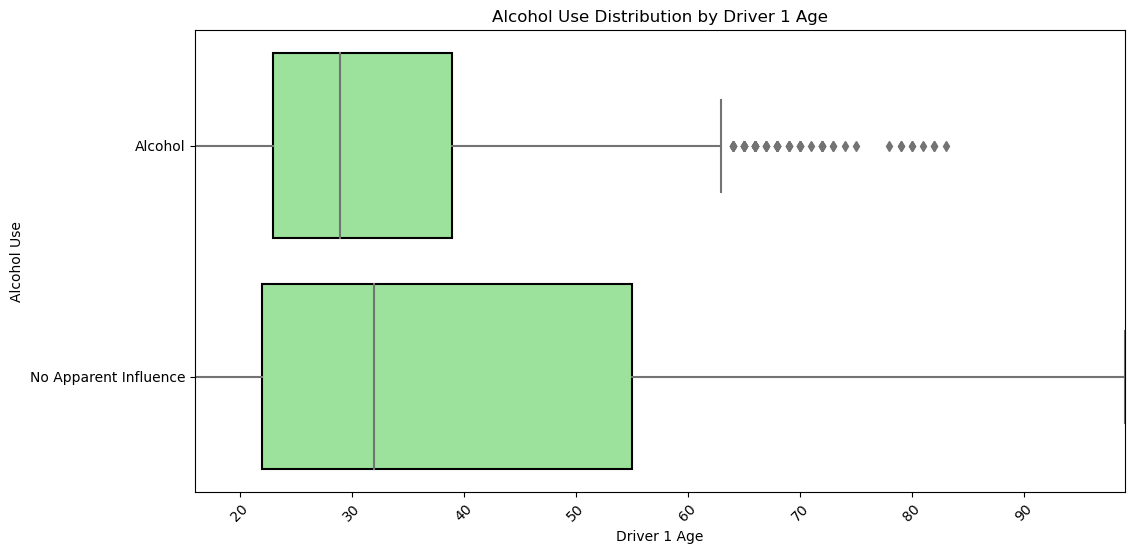

In [125]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age_Drv1', y='AlcoholUse_Drv1', data=strike_df, color='lightgreen', linewidth=1.5, fliersize=5, boxprops=dict(edgecolor='black', linewidth=1.5))
plt.xlabel('Driver 1 Age')
plt.ylabel('Alcohol Use')
plt.title('Alcohol Use Distribution by Driver 1 Age')
plt.xticks(rotation=45)
plt.xlim(16, 99)
plt.show()


<a id='section2'></a>
## 2. Insight number Two:

* **ניתוח הגרפים של השימוש באלכוהול לפי גיל הנהג הראשון מראה כי נהגים צעירים (בגילאי 18-30) נוטים לשימוש באלכוהול יותר מאשר נהגים מבוגרים יותר. כמו כן, ניתן לראות שנהגים בגילאים מבוגרים יותר (50+) משתמשים פחות באלכוהול בהשוואה לנהגים הצעירים יותר. מסקנה זו מצביעה על כך שישנו צורך בחינוך ובאכיפה מוגברת של נהיגה בשכרות בקרב אוכלוסיות צעירות כדי לצמצם את מספר התאונות הנגרמות בשל שימוש באלכוהול**

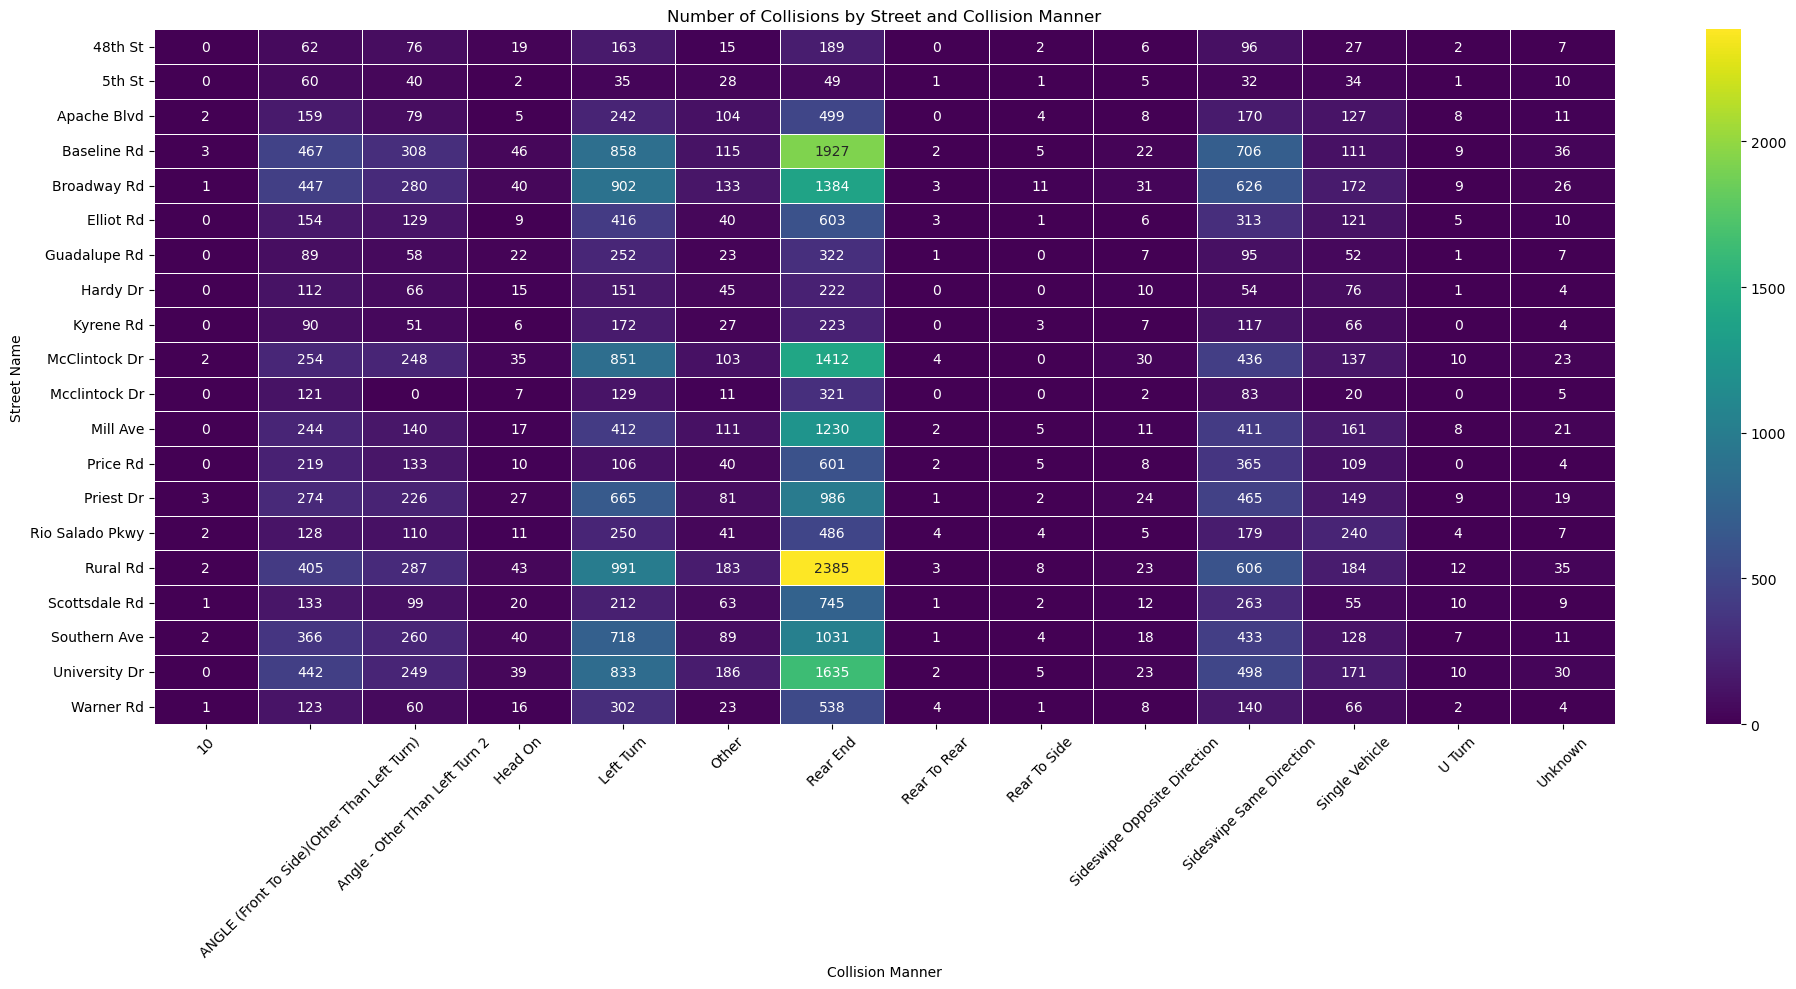

In [126]:
top_streets = strike_df['StreetName'].value_counts().head(20).index.tolist()
df_top_streets = strike_df[strike_df['StreetName'].isin(top_streets)]

# יצירת טבלת ציר (pivot table) עם מספר ההתנגשויות לפי רחוב וסוג התנגשות
pivot_table = df_top_streets.pivot_table(index='StreetName', columns='Collisionmanner', aggfunc='size', fill_value=0)

# יצירת גרף חום (heatmap)
plt.figure(figsize=(20, 10))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="viridis", linewidths=.5)
plt.xlabel('Collision Manner')
plt.ylabel('Street Name')
plt.title('Number of Collisions by Street and Collision Manner')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

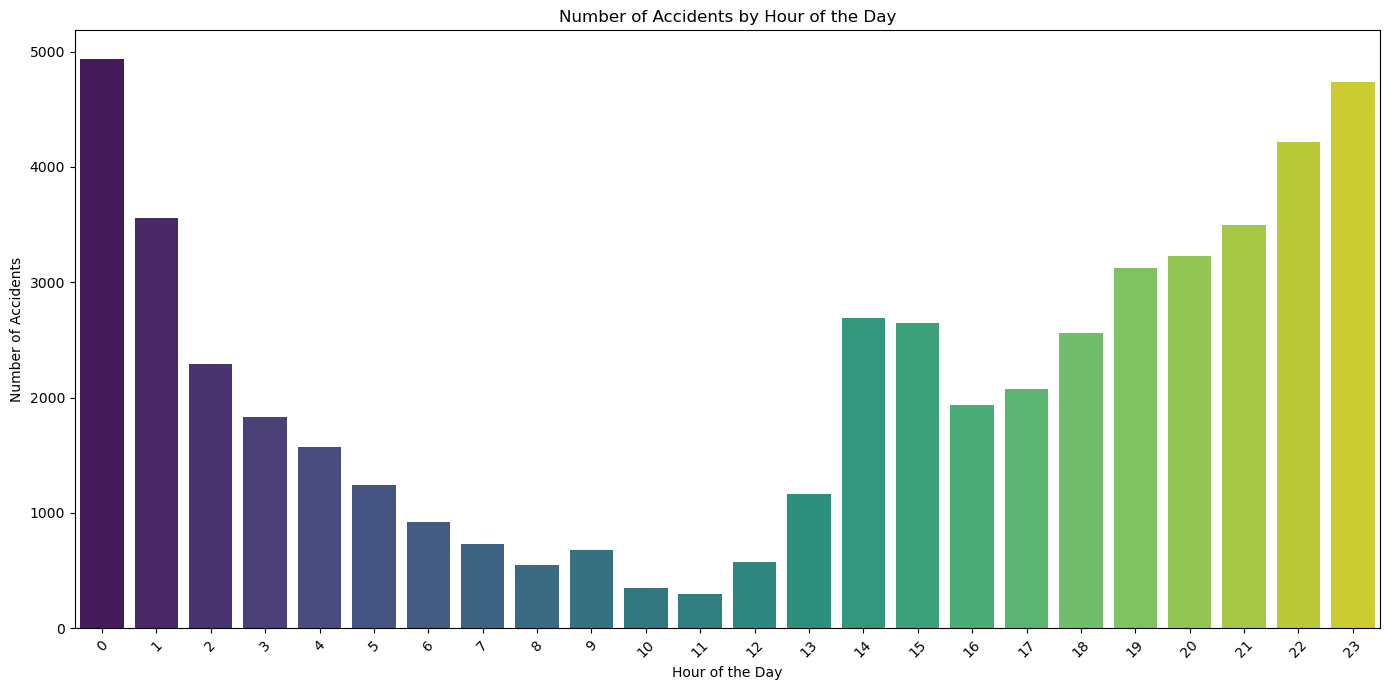

In [127]:
# הנחה שעמודת DateTime היא מסוג תאריך ושעה
strike_df['Hour'] = pd.to_datetime(strike_df['DateTime']).dt.hour

# ספירת מספר התאונות בכל שעה
accidents_by_hour = strike_df['Hour'].value_counts().reset_index()
accidents_by_hour.columns = ['Hour', 'Number of Accidents']
accidents_by_hour = accidents_by_hour.sort_values(by='Hour')

# יצירת גרף עמודות
plt.figure(figsize=(14, 7))
sns.barplot(x='Hour', y='Number of Accidents', data=accidents_by_hour, palette='viridis')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Hour of the Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Yuval\AppData\Local\Temp\ipykernel_3952\3945918227.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\Yuval\AppData\Local\Temp\ipykernel_3952\3945918227.py:12: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\Yuval\AppData\Local\Temp\ipykernel_3952\3945918227.py:19: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\Yuval\AppData\Local\Temp\ipykernel_3952\3945918227.py:26: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




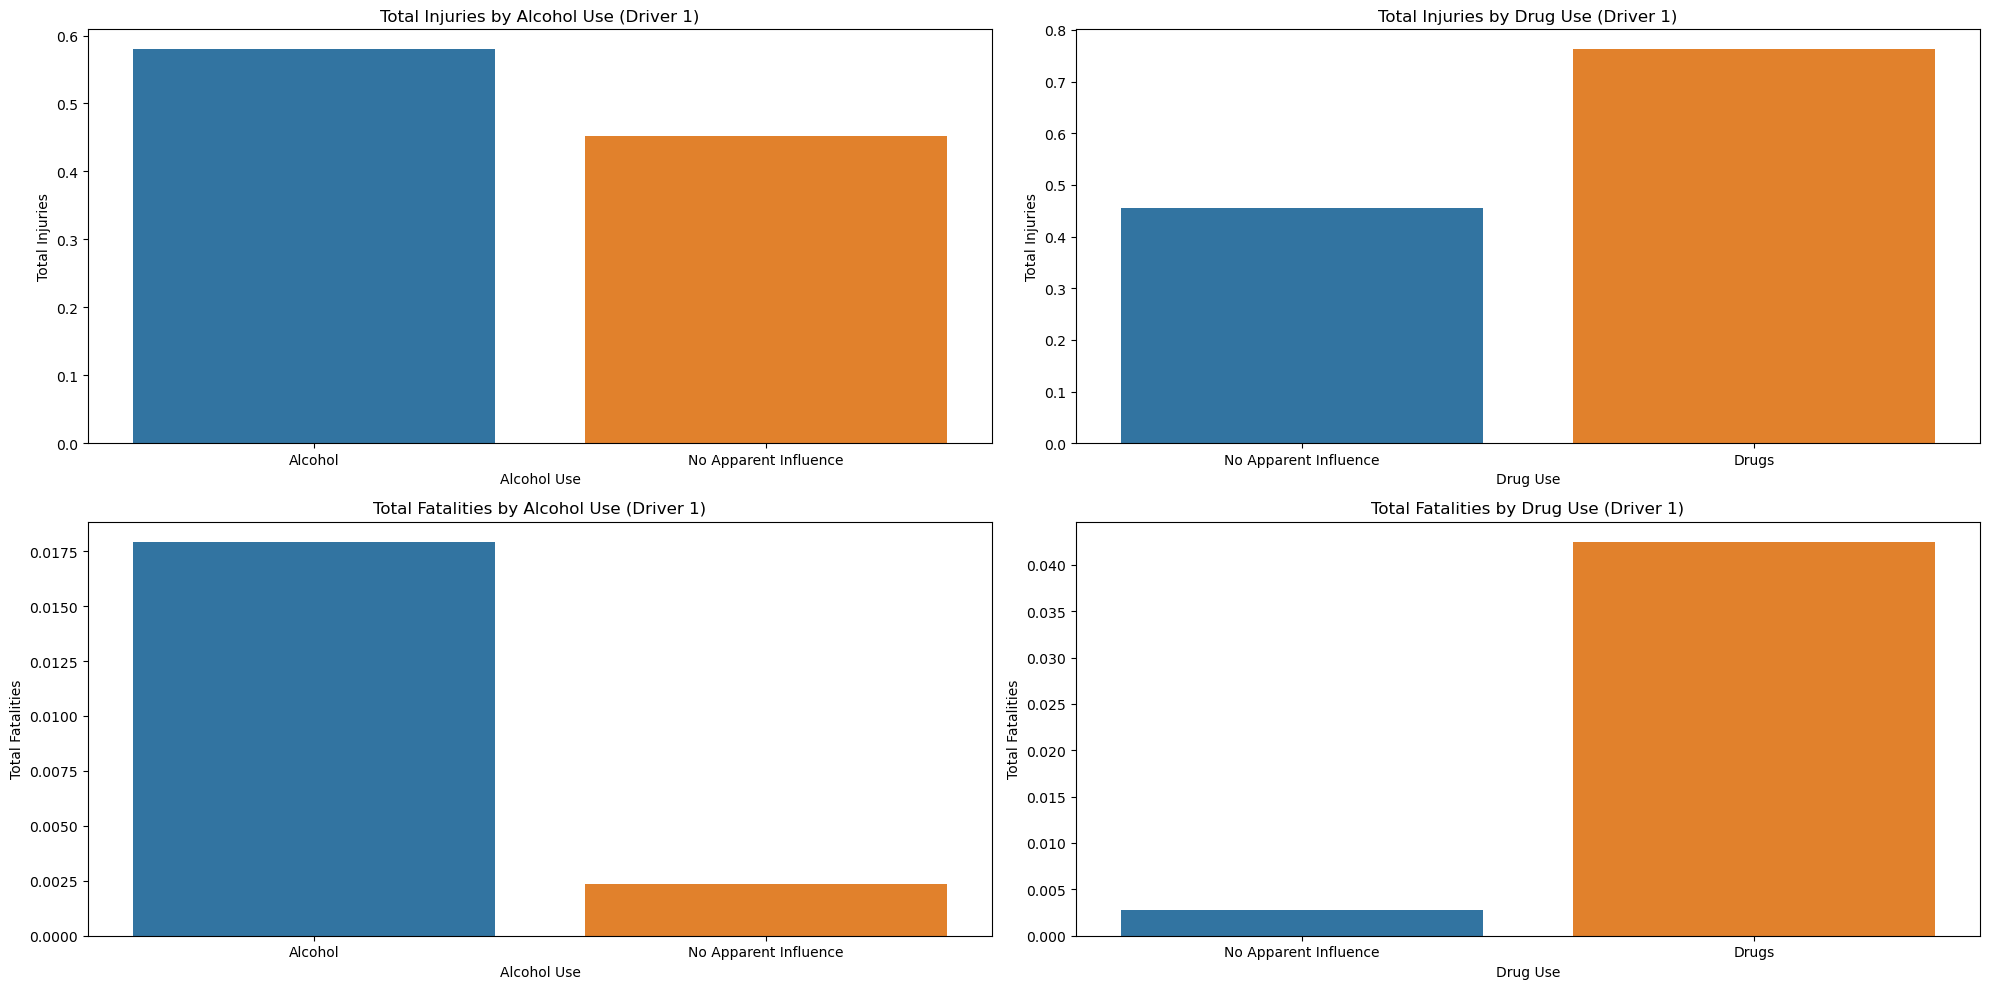

In [128]:
# גרף שמראה את השפעת שימוש באלכוהול על סך הנפגעים
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
sns.barplot(x='AlcoholUse_Drv1', y='Totalinjuries', data=strike_df, ci=None)
plt.xlabel('Alcohol Use')
plt.ylabel('Total Injuries')
plt.title('Total Injuries by Alcohol Use (Driver 1)')

# גרף שמראה את השפעת שימוש בסמים על סך הנפגעים
plt.subplot(2, 2, 2)
sns.barplot(x='DrugUse_Drv1', y='Totalinjuries', data=strike_df, ci=None)
plt.xlabel('Drug Use')
plt.ylabel('Total Injuries')
plt.title('Total Injuries by Drug Use (Driver 1)')

# גרף שמראה את השפעת שימוש באלכוהול על סך הנפטרים
plt.subplot(2, 2, 3)
sns.barplot(x='AlcoholUse_Drv1', y='Totalfatalities', data=strike_df, ci=None)
plt.xlabel('Alcohol Use')
plt.ylabel('Total Fatalities')
plt.title('Total Fatalities by Alcohol Use (Driver 1)')

# גרף שמראה את השפעת שימוש בסמים על סך הנפטרים
plt.subplot(2, 2, 4)
sns.barplot(x='DrugUse_Drv1', y='Totalfatalities', data=strike_df, ci=None)
plt.xlabel('Drug Use')
plt.ylabel('Total Fatalities')
plt.title('Total Fatalities by Drug Use (Driver 1)')

plt.tight_layout()
plt.show()
